### **Pytorch Fundamental**

In [2]:
!nvidia-smi

Thu Oct 31 15:52:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.0+cu121


In [4]:
torch.cuda.is_available()

True

In [5]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
torch.cuda.device_count()

1

## **Day 6**

In [9]:
#Pytorch Workflow
what_were_covering={1: "data prepare",
                    2:"build model",
                    3:"training model",
                    4:"prediction and evaluation",
                    5:"save and reload",
                    6:"putting all together"}

In [8]:
import torch
from torch import nn #nn contain all layers of pytorch
import matplotlib.pyplot as plt

torch.__version__

'2.5.0+cu121'

# **Data (preparing and loading)**

Data can be everything in machine learning

*text, img, audio, video......

Machine learning have two parts:
1. Get data into numerical.
2. Build model to learn patterns in that numerical representation.

Using linear regression formula

In [21]:
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [22]:
#Train/Test/Split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [23]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data, and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14})

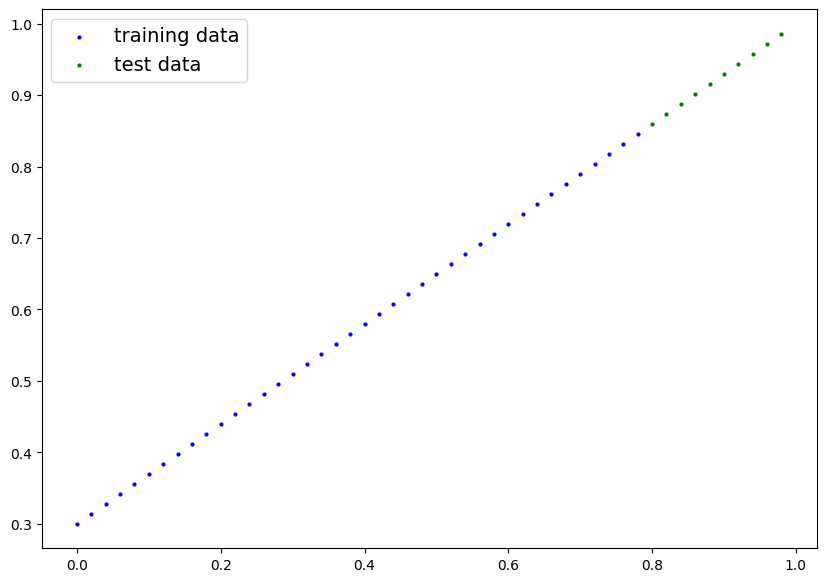

In [24]:
plot_predictions()